# 🔹 UFC Model Experiments

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Import Libraries and Setup Environment

In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 200) 

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root))
from src.metrics import *
from src.model_factory import model_factory
from src.model import UFCModel
from src.data import UFCData
from src.config import *
from src.io_model import load_data, load_all_models
from src.helpers import *

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Load Data

In [2]:
# Load UFCData
try:
    ufc_data = load_data(name='ufc_data')
    ufc_data_no_odds = load_data(name='ufc_data_no_odds')
    logger.info("✅ UFCData objects loaded successfully.")
except Exception as e:
    logger.error(f"❌ Error loading training data: {e}")

INFO:src.io_model:📦 UFCData object loaded from: /home/mlioi/ufc-predictor/data/processed/ufc_data.pkl
INFO:src.io_model:📦 UFCData object loaded from: /home/mlioi/ufc-predictor/data/processed/ufc_data_no_odds.pkl
INFO:src.helpers:✅ UFCData objects loaded successfully.


In [3]:
ufc_data

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6001
🧪 Train/Test split  : 4800 / 1201
🧪 Total features     : 20

🔢 Numerical features : 17
🔠 Categorical features: 3
    - Binary          : 2
    - Multiclass      : 1

🏷 Label distribution (raw):
   - Class 0: 3484 (58.1%)
   - Class 1: 2517 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                        mean      std       min       max
LoseStreakDif          0.059    1.012    -6.000     6.000
WinStreakDif          -0.162    1.921   -18.000    10.000
TotalTitleBoutDif     -0.313    1.709   -16.000    15.000
KODif                 -0.536    2.181   -21.000    14.000
SubDif                -0.334    1.877   -15.000    10.000
HeightDif             -0.030    6.286   -33.020    30.480
ReachDif              -0.260    8.266   -33.020    30.480
AgeDif                 0.196    5.213   -17.000    17.000
SigStrDif             -2.540   19.869  -118.000   128.222
AvgSubAt

In [4]:
ufc_data_no_odds

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6001
🧪 Train/Test split  : 4800 / 1201
🧪 Total features     : 19

🔢 Numerical features : 16
🔠 Categorical features: 3
    - Binary          : 2
    - Multiclass      : 1

🏷 Label distribution (raw):
   - Class 0: 3484 (58.1%)
   - Class 1: 2517 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                      mean     std      min      max
LoseStreakDif        0.059   1.012   -6.000    6.000
WinStreakDif        -0.162   1.921  -18.000   10.000
TotalTitleBoutDif   -0.313   1.709  -16.000   15.000
KODif               -0.536   2.181  -21.000   14.000
SubDif              -0.334   1.877  -15.000   10.000
HeightDif           -0.030   6.286  -33.020   30.480
ReachDif            -0.260   8.266  -33.020   30.480
AgeDif               0.196   5.213  -17.000   17.000
SigStrDif           -2.540  19.869 -118.000  128.222
AvgSubAttDif        -0.076   0.880   -8.400    7.800
AvgTD

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Load Models

In [5]:
model_list = load_all_models()

INFO:src.io_model:📦 Model 'Logistic Regression' loaded from: /home/mlioi/ufc-predictor/models/lr_best.pkl
INFO:src.io_model:✅ Loaded model: Logistic Regression
INFO:src.io_model:📦 Model 'Logistic Regression' loaded from: /home/mlioi/ufc-predictor/models/lr_best_no_odds.pkl
INFO:src.io_model:✅ Loaded model: Logistic Regression (no_odds)
INFO:src.io_model:📦 Model 'Random Forest' loaded from: /home/mlioi/ufc-predictor/models/rf_best.pkl
INFO:src.io_model:✅ Loaded model: Random Forest
INFO:src.io_model:📦 Model 'Random Forest' loaded from: /home/mlioi/ufc-predictor/models/rf_best_no_odds.pkl
INFO:src.io_model:✅ Loaded model: Random Forest (no_odds)
INFO:src.io_model:📦 Model 'Support Vector Machine' loaded from: /home/mlioi/ufc-predictor/models/svm_best.pkl
INFO:src.io_model:✅ Loaded model: Support Vector Machine
INFO:src.io_model:📦 Model 'Support Vector Machine' loaded from: /home/mlioi/ufc-predictor/models/svm_best_no_odds.pkl
INFO:src.io_model:✅ Loaded model: Support Vector Machine (no_od

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Evaluate Models

In [6]:
models_with_odds = [m for m in model_list if not m.is_no_odds]
models_no_odds = [m for m in model_list if m.is_no_odds]

# Evaluate metrics for WITH ODDS
for model in models_with_odds:
    model.metrics = evaluate_metrics(model, ufc_data)
    model.cm = evaluate_cm(model, ufc_data)

# Evaluate metrics for NO ODDS
for model in models_no_odds:
    model.metrics = evaluate_metrics(model, ufc_data_no_odds)
    model.cm = evaluate_cm(model, ufc_data_no_odds)

# Check Models

## Metrics Comparison

In [7]:
# Compare metrics WITH ODDS
metrics_with_odds = compare_metrics(models_with_odds)
display(metrics_with_odds)

INFO:src.metrics:🔍 Starting comparison of models...
INFO:src.metrics:Evaluating model: Logistic Regression
INFO:src.metrics:Evaluating model: Random Forest
INFO:src.metrics:Evaluating model: Support Vector Machine
INFO:src.metrics:Evaluating model: K-Nearest Neighbors
INFO:src.metrics:Evaluating model: AdaBoost
INFO:src.metrics:Evaluating model: Naive Bayes
INFO:src.metrics:Evaluating model: Extra Trees
INFO:src.metrics:Evaluating model: Gradient Boosting
INFO:src.metrics:Evaluating model: Quadratic Discriminant Analysis
INFO:src.metrics:Evaluating model: Neural Network
INFO:src.metrics:Evaluating model: XGBoost
INFO:src.metrics:✅ Comparison completed.


,Accuracy,Precision,Recall,F1 Score,ROC AUC,Brier Score
Model,,,,,,
Logistic Regression,0.6595,0.6112,0.5179,0.5607,0.7132,0.2146
Random Forest,0.6545,0.6386,0.4067,0.4970,0.7053,0.2182
Support Vector Machine,0.6586,0.6068,0.5298,0.5657,0.7115,0.2129
K-Nearest Neighbors,0.6037,0.5363,0.4107,0.4652,0.6297,0.2383
AdaBoost,0.6553,0.6264,0.4425,0.5186,0.7102,0.2126
Naive Bayes,0.6228,0.5464,0.5952,0.5698,0.6597,0.2405
Extra Trees,0.6503,0.6173,0.4385,0.5128,0.6750,0.2227
Gradient Boosting,0.6578,0.6396,0.4226,0.5090,0.7117,0.2161
Quadratic Discriminant Analysis,0.6495,0.5950,0.5159,0.5526,0.6885,0.2216


In [8]:
# Compare metrics NO ODDS
metrics_no_odds = compare_metrics(models_no_odds)
display(metrics_no_odds)

INFO:src.metrics:🔍 Starting comparison of models...
INFO:src.metrics:Evaluating model: Logistic Regression (no_odds)
INFO:src.metrics:Evaluating model: Random Forest (no_odds)
INFO:src.metrics:Evaluating model: Support Vector Machine (no_odds)
INFO:src.metrics:Evaluating model: K-Nearest Neighbors (no_odds)
INFO:src.metrics:Evaluating model: AdaBoost (no_odds)
INFO:src.metrics:Evaluating model: Naive Bayes (no_odds)
INFO:src.metrics:Evaluating model: Extra Trees (no_odds)
INFO:src.metrics:Evaluating model: Gradient Boosting (no_odds)
INFO:src.metrics:Evaluating model: Quadratic Discriminant Analysis (no_odds)
INFO:src.metrics:Evaluating model: Neural Network (no_odds)
INFO:src.metrics:Evaluating model: XGBoost (no_odds)
INFO:src.metrics:✅ Comparison completed.


,Accuracy,Precision,Recall,F1 Score,ROC AUC,Brier Score
Model,,,,,,
Logistic Regression (no_odds),0.6037,0.5609,0.2560,0.3515,0.6049,0.2344
Random Forest (no_odds),0.5970,0.5510,0.2143,0.3086,0.6013,0.2355
Support Vector Machine (no_odds),0.6070,0.5988,0.1925,0.2913,0.5733,0.2379
K-Nearest Neighbors (no_odds),0.5504,0.4567,0.3770,0.4130,0.5370,0.2595
AdaBoost (no_odds),0.6037,0.5556,0.2778,0.3704,0.5985,0.2364
Naive Bayes (no_odds),0.5720,0.4903,0.5000,0.4951,0.5684,0.2577
Extra Trees (no_odds),0.5920,0.5897,0.0913,0.1581,0.5833,0.2381
Gradient Boosting (no_odds),0.6103,0.5882,0.2381,0.3390,0.6029,0.2347
Quadratic Discriminant Analysis (no_odds),0.5978,0.5308,0.3591,0.4284,0.5985,0.2381


## Best Model per Metric

In [9]:
# Best models WITH ODDS
best_with_odds = best_model_per_metric(metrics_with_odds)
display(best_with_odds)

INFO:src.metrics:🏅 Best model for Accuracy: Logistic Regression (0.6595)
INFO:src.metrics:🏅 Best model for Precision: Gradient Boosting (0.6396)
INFO:src.metrics:🏅 Best model for Recall: Naive Bayes (0.5952)
INFO:src.metrics:🏅 Best model for F1 Score: Naive Bayes (0.5698)
INFO:src.metrics:🏅 Best model for ROC AUC: Logistic Regression (0.7132)
INFO:src.metrics:🏅 Best model for Brier Score: XGBoost (0.2116)


,Metric,Best Model,Value
0,Accuracy,Logistic Regression,0.6595
1,Precision,Gradient Boosting,0.6396
2,Recall,Naive Bayes,0.5952
3,F1 Score,Naive Bayes,0.5698
4,ROC AUC,Logistic Regression,0.7132
5,Brier Score,XGBoost,0.2116


In [10]:
# Best models NO ODDS
best_no_odds = best_model_per_metric(metrics_no_odds)
display(best_no_odds)

INFO:src.metrics:🏅 Best model for Accuracy: XGBoost (no_odds) (0.6120)
INFO:src.metrics:🏅 Best model for Precision: Support Vector Machine (no_odds) (0.5988)
INFO:src.metrics:🏅 Best model for Recall: Naive Bayes (no_odds) (0.5000)
INFO:src.metrics:🏅 Best model for F1 Score: Naive Bayes (no_odds) (0.4951)
INFO:src.metrics:🏅 Best model for ROC AUC: XGBoost (no_odds) (0.6143)
INFO:src.metrics:🏅 Best model for Brier Score: XGBoost (no_odds) (0.2335)


,Metric,Best Model,Value
0,Accuracy,XGBoost (no_odds),0.6120
1,Precision,Support Vector Machine (no_odds),0.5988
2,Recall,Naive Bayes (no_odds),0.5000
3,F1 Score,Naive Bayes (no_odds),0.4951
4,ROC AUC,XGBoost (no_odds),0.6143
5,Brier Score,XGBoost (no_odds),0.2335


## Feature Importance

In [11]:
feature_names_with_odds = ufc_data.get_processed_train()[0].columns.tolist()
feature_names_no_odds = ufc_data_no_odds.get_processed_train()[0].columns.tolist()

INFO:src.model:✅ Plot saved to: /home/mlioi/ufc-predictor/img/Noise-based-feature-selection-part5


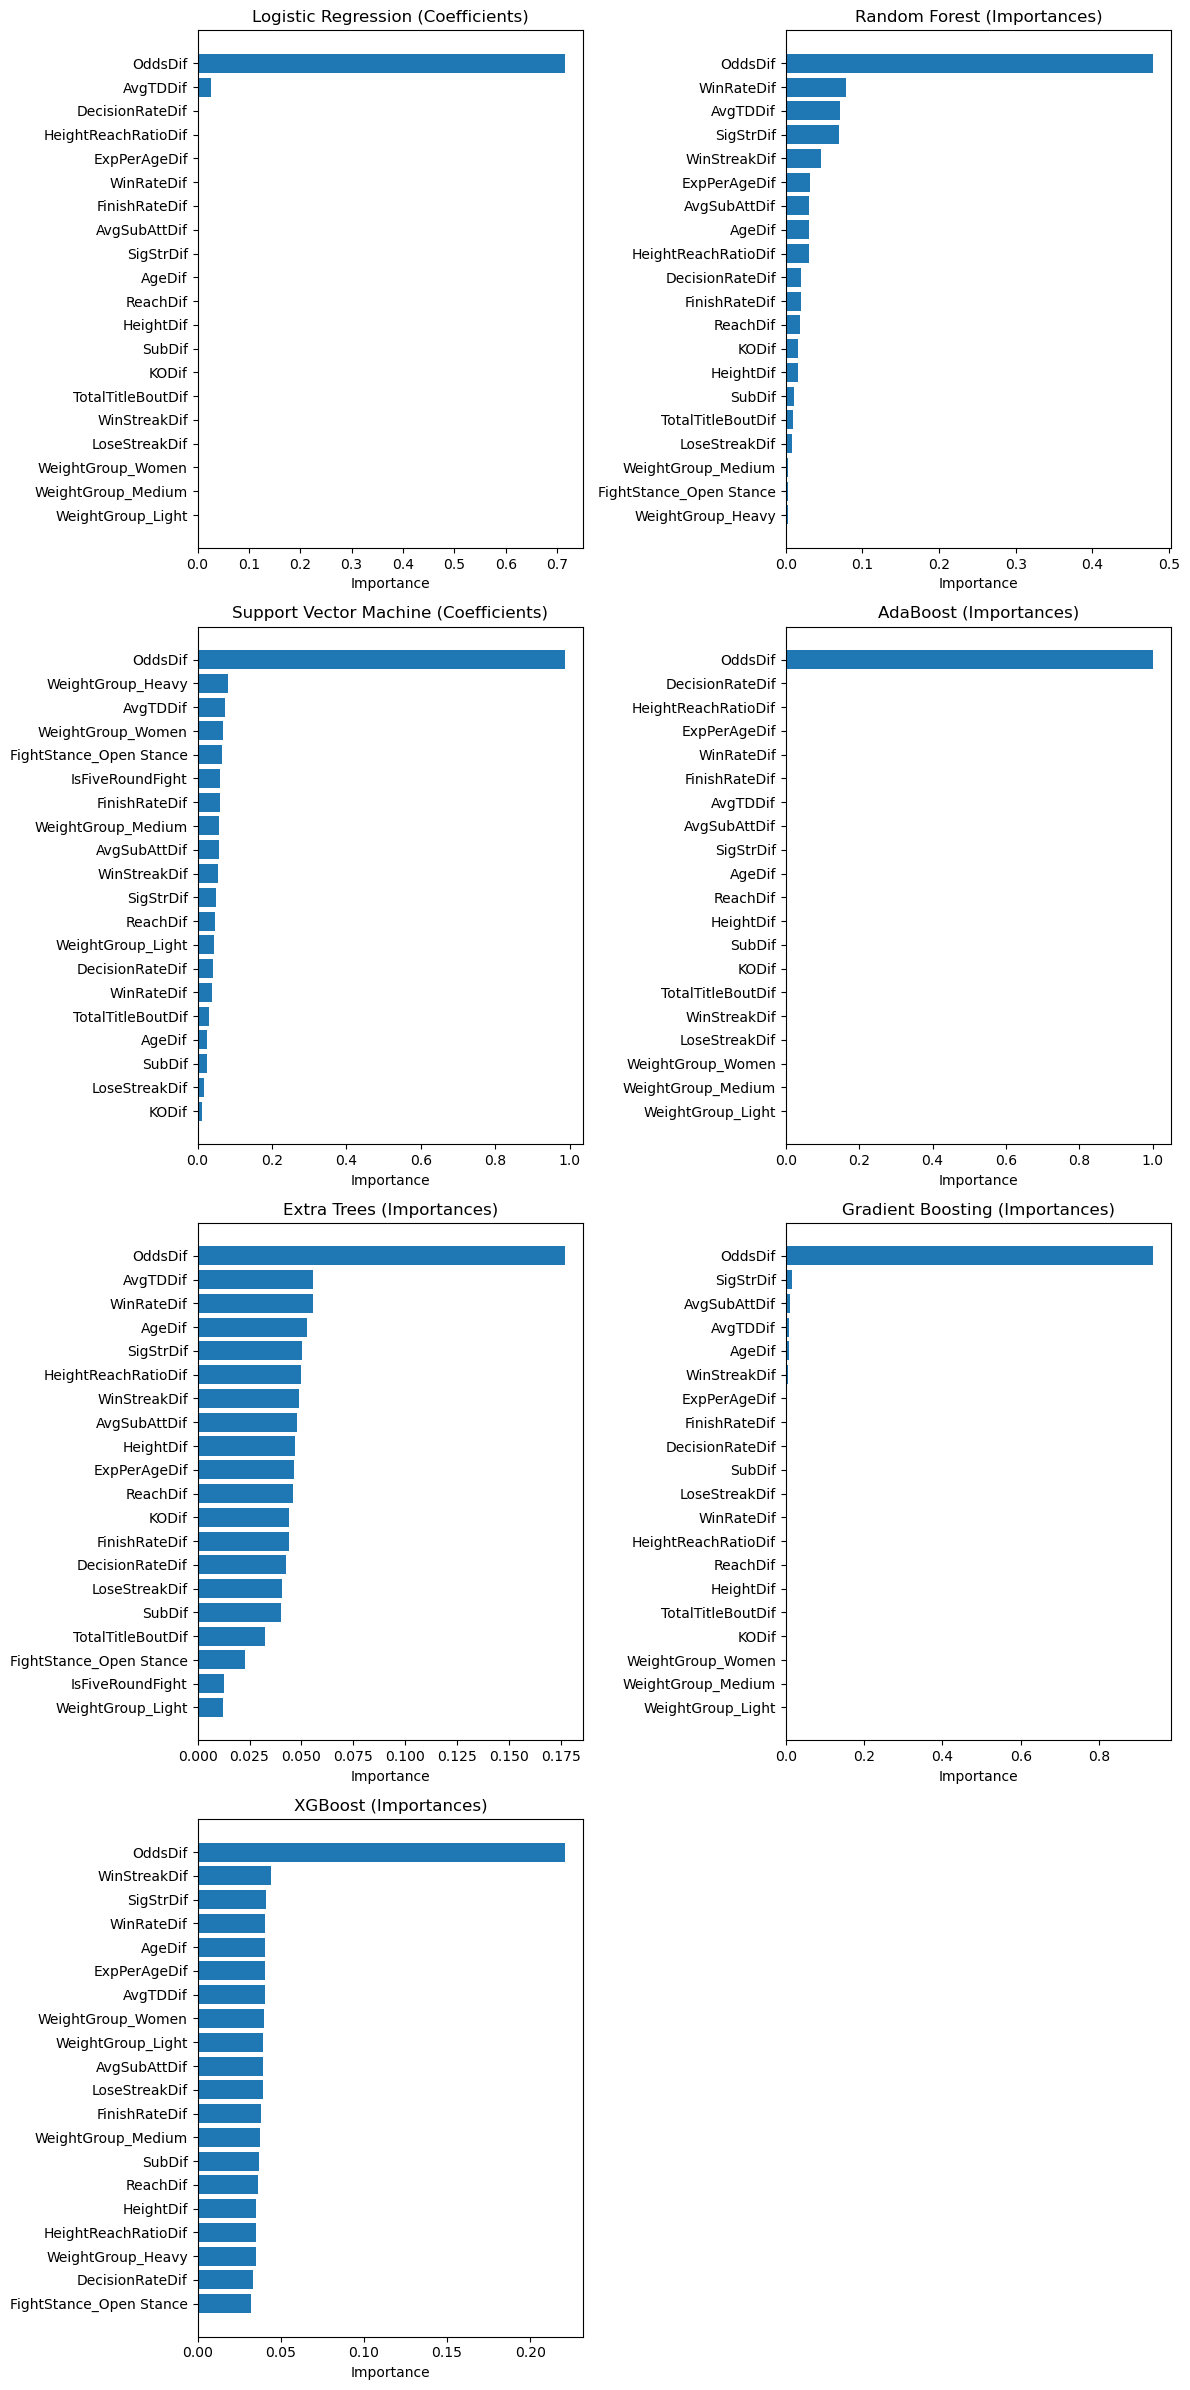

In [12]:
UFCModel.plot_feature_importances_grid(
    models_with_odds,
    feature_names=feature_names_with_odds,
    save_file=True,
    filename='Noise-based-feature-selection-part5'
)

INFO:src.model:✅ Plot saved to: /home/mlioi/ufc-predictor/img/Feature-importance-no-odds-part1


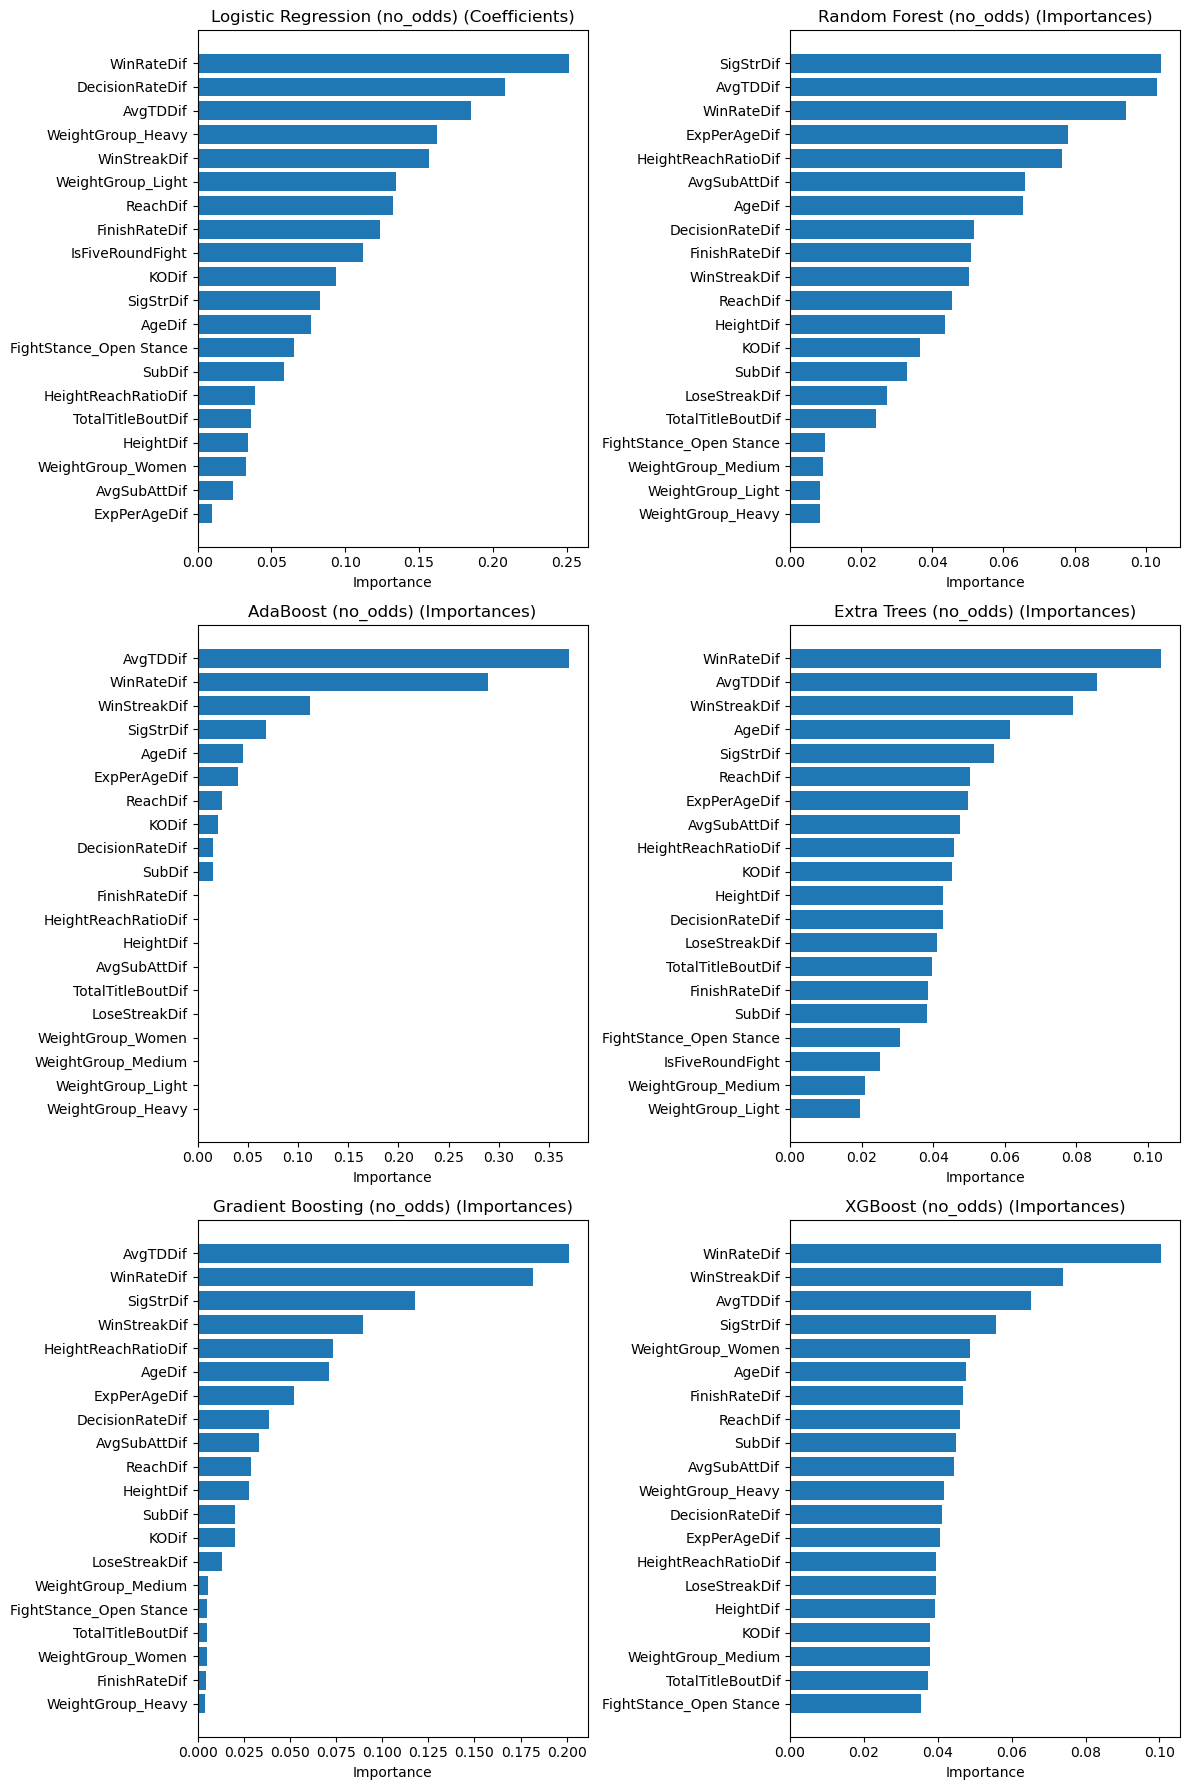

In [13]:
UFCModel.plot_feature_importances_grid(
    models_no_odds,
    feature_names=feature_names_no_odds,
    save_file=True,
    filename='Feature-importance-no-odds-part1'
)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

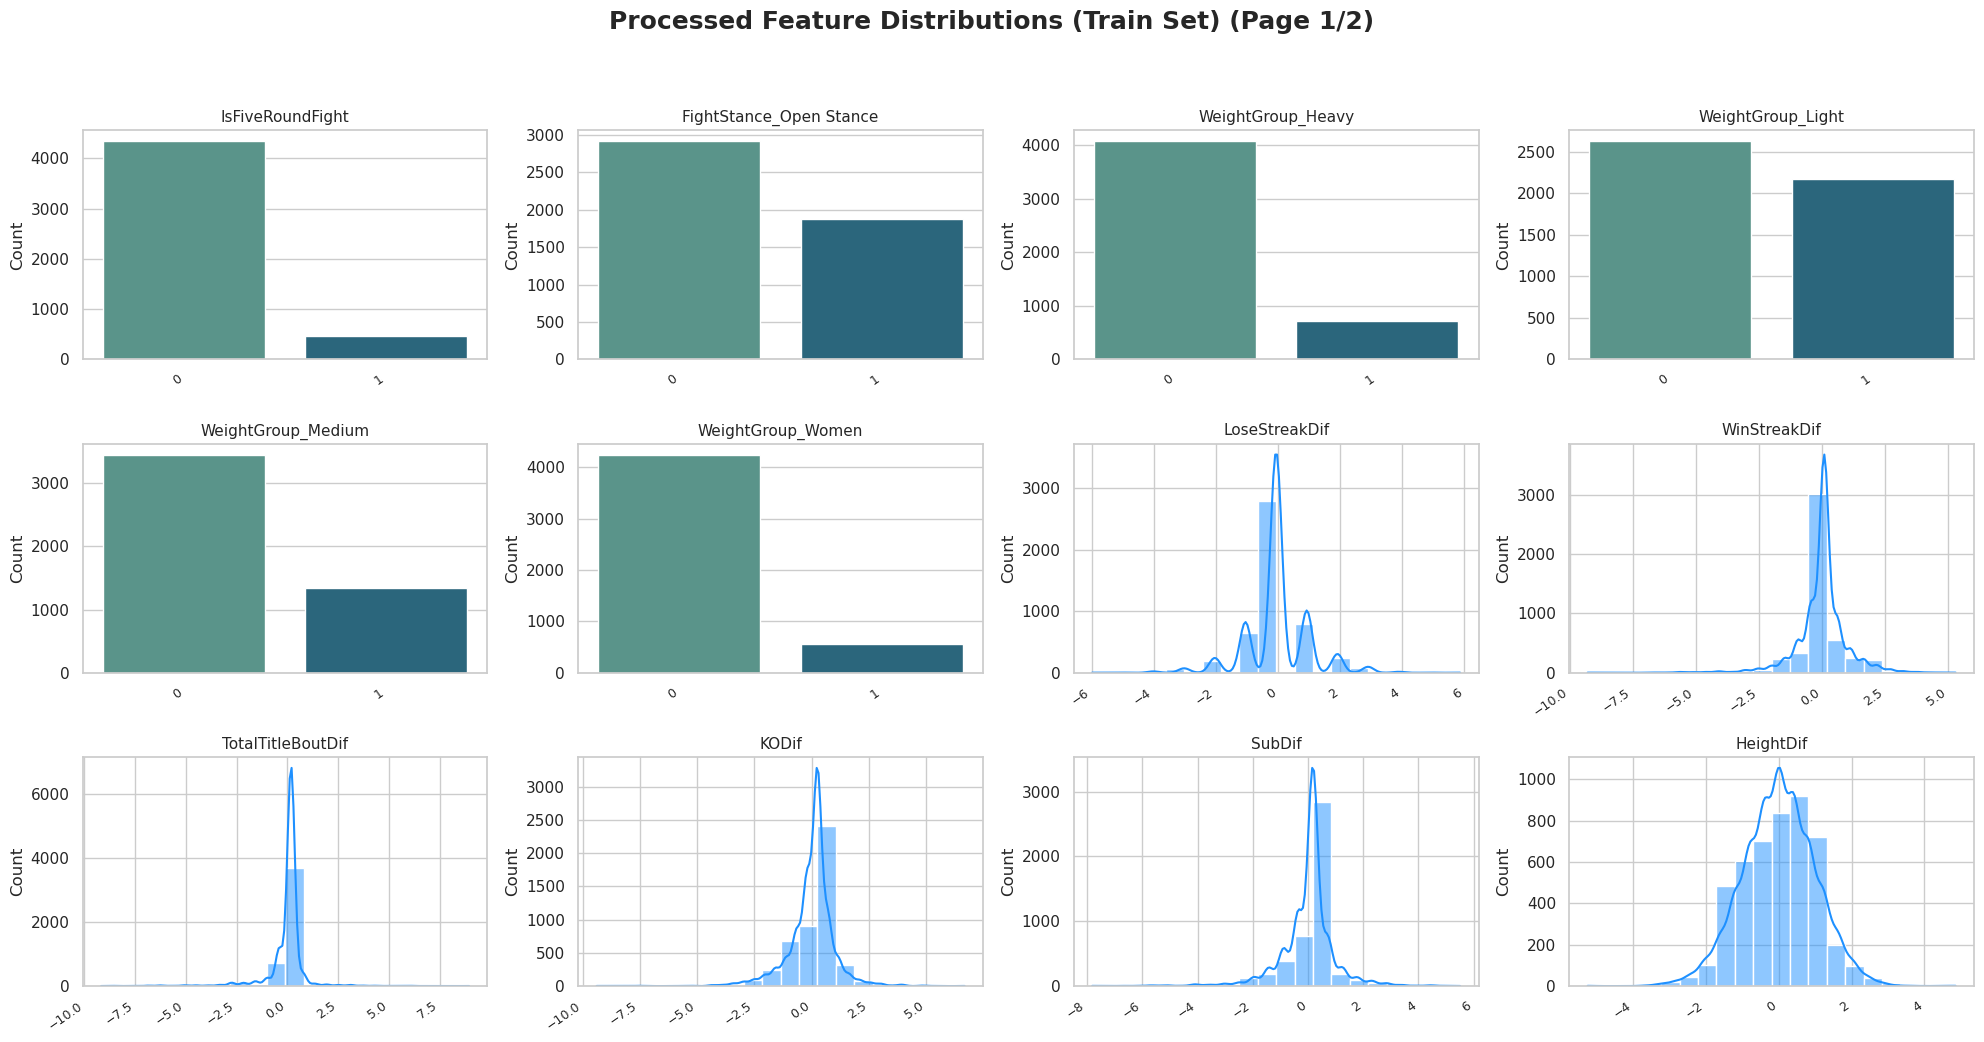

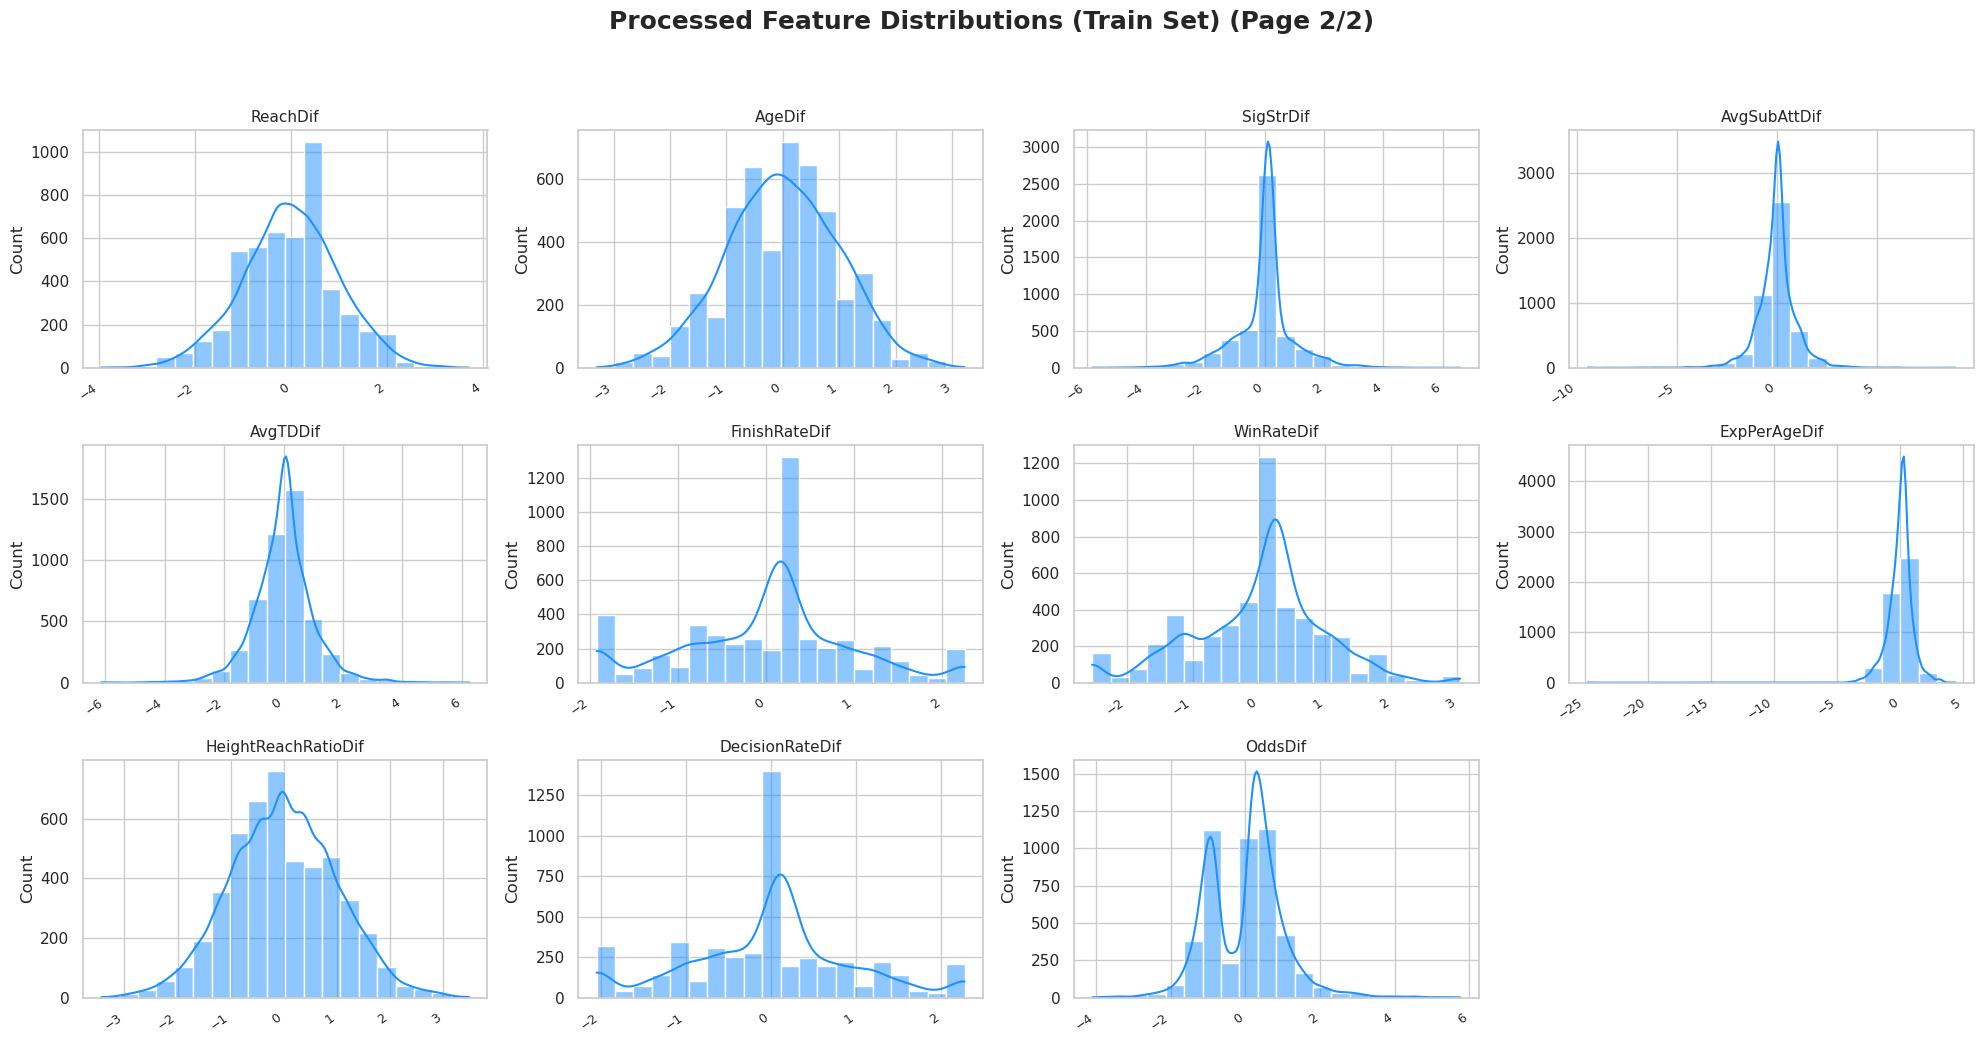

In [14]:
ufc_data.plot_feature_distributions(processed=True)